In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv("Electricity_Generation.csv", header=None, names=range(47))
table_names = ["Canada", "Newfoundland and Labrador", "Prince Edward Island", "Nova Scotia", "New Brunswick","Quebec", "Ontario","Manitoba", "Alberta", "British Columbia", "Saskatchewan", "Yukon", "Northwest Territories", "Nunavut"]

groups = df[0].isin(table_names).cumsum()

tables = {g.iloc[0,0]: g.iloc[1:-1] for k,g in df.groupby(groups)}

In [11]:
tables2 ={}
for k,v in tables.items(): 
    v.iloc[0,0] = "year"
    v = v.T
    v.columns = v.iloc[0] # set first row as column names
    v = v.iloc[1:] # take all the row except the fisrt one
    #v = v.T
    tables2[k] = v  
  
for k,v in tables2.items():
    print('key:', k)
    #print( v)
  

key: Canada
key: Newfoundland and Labrador
key: Prince Edward Island
key: Nova Scotia
key: New Brunswick
key: Quebec
key: Ontario
key: Manitoba
key: Alberta
key: British Columbia
key: Saskatchewan
key: Yukon
key: Northwest Territories
key: Nunavut


In [12]:
for k, v in tables2.items():
    print(k)
    print(v.isna().sum())
    print('-'*27)

Canada
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal    0
Solar                   0
Uranium                 0
Coal & Coke             0
Natural Gas             0
Oil                     0
dtype: int64
---------------------------
Newfoundland and Labrador
0
year                     0
Hydro / Wave / Tidal     0
Wind                     0
Biomass / Geothermal    31
Solar                    0
Uranium                 31
Coal & Coke             31
Natural Gas              0
Oil                      0
dtype: int64
---------------------------
Prince Edward Island
0
year                     0
Hydro / Wave / Tidal    31
Wind                     0
Biomass / Geothermal     0
Solar                    0
Uranium                  0
Coal & Coke             31
Natural Gas             31
Oil                      0
dtype: int64
---------------------------
Nova Scotia
0
year                     0
Hydro / Wave / Tidal     0
Wind                     0
Bi

In [13]:
Table_clean ={}
for k, v in tables2.items():
    Table_clean[k] = v.fillna(0)

C:\Users\HOME\AppData\Local\Temp\ipykernel_11408\3461693673.py:3: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Table_clean[k] = v.fillna(0)


In [14]:
for k, v in Table_clean.items():
    print(k)
    print(v.isna().sum())
    print('-'*27)

Canada
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal    0
Solar                   0
Uranium                 0
Coal & Coke             0
Natural Gas             0
Oil                     0
dtype: int64
---------------------------
Newfoundland and Labrador
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal    0
Solar                   0
Uranium                 0
Coal & Coke             0
Natural Gas             0
Oil                     0
dtype: int64
---------------------------
Prince Edward Island
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal    0
Solar                   0
Uranium                 0
Coal & Coke             0
Natural Gas             0
Oil                     0
dtype: int64
---------------------------
Nova Scotia
0
year                    0
Hydro / Wave / Tidal    0
Wind                    0
Biomass / Geothermal   

In [15]:
for k, v in Table_clean.items():
    Table_clean[k] = v.drop(v.index[19:])
    print(Table_clean[k])

0     year  Hydro / Wave / Tidal      Wind  Biomass / Geothermal     Solar  \
1   2005.0             358380.80   1453.41               6997.43      0.00   
2   2006.0             349124.50   2529.41               7143.38      0.00   
3   2007.0             363798.50   3683.41               6971.02      0.00   
4   2008.0             373817.30   4715.44               6319.81      0.00   
5   2009.0             365011.80   7031.23               6057.39      5.00   
6   2010.0             347937.50   8354.23               8266.52    123.00   
7   2011.0             371953.20  11622.99               8716.90    398.00   
8   2012.0             375760.20  13716.78               9038.92    842.00   
9   2013.0             387396.20  17544.74               9208.18   1173.00   
10  2014.0             378786.20  21484.50              11997.93   1757.71   
11  2015.0             378498.40  26692.57               8462.34   1426.00   
12  2016.0             381710.10  30624.00              10240.42

0     year  Hydro / Wave / Tidal     Wind  Biomass / Geothermal  Solar  \
1   2005.0                   0.0    40.00                  0.00   0.00   
2   2006.0                   0.0    36.00                  0.00   0.00   
3   2007.0                   0.0    40.00                  0.00   0.00   
4   2008.0                   0.0   142.00                  5.00   0.00   
5   2009.0                   0.0   347.00                  5.00   0.00   
6   2010.0                   0.0   458.00                  5.00   0.00   
7   2011.0                   0.0   488.00                  5.00   0.00   
8   2012.0                   0.0   468.00                  5.00   0.00   
9   2013.0                   0.0   499.00                  5.00   0.00   
10  2014.0                   0.0   611.28                  2.50   0.00   
11  2015.0                   0.0   606.00                  3.00   0.00   
12  2016.0                   0.0   594.00                  3.00   0.00   
13  2017.0                   0.0   604

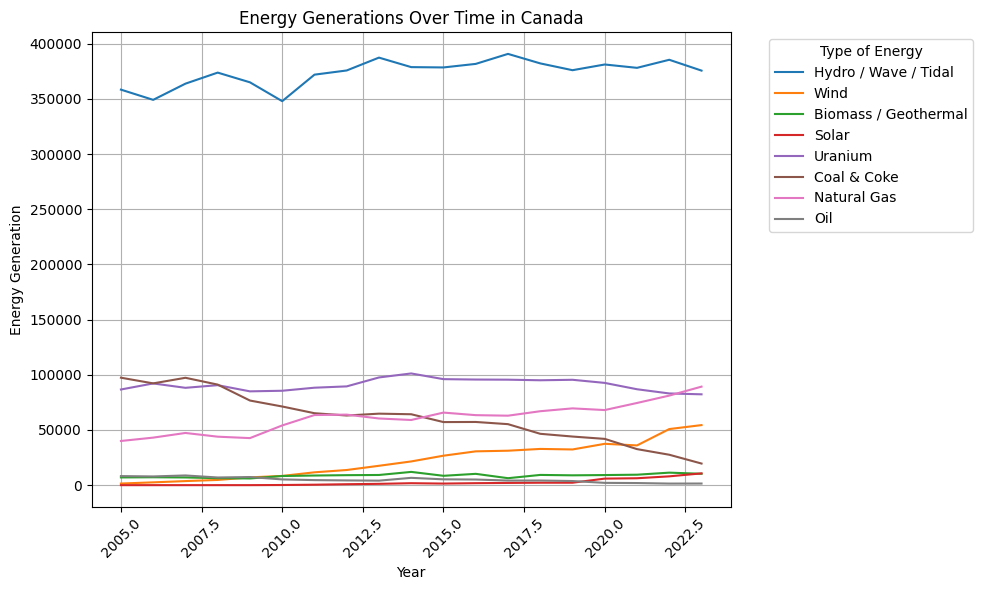

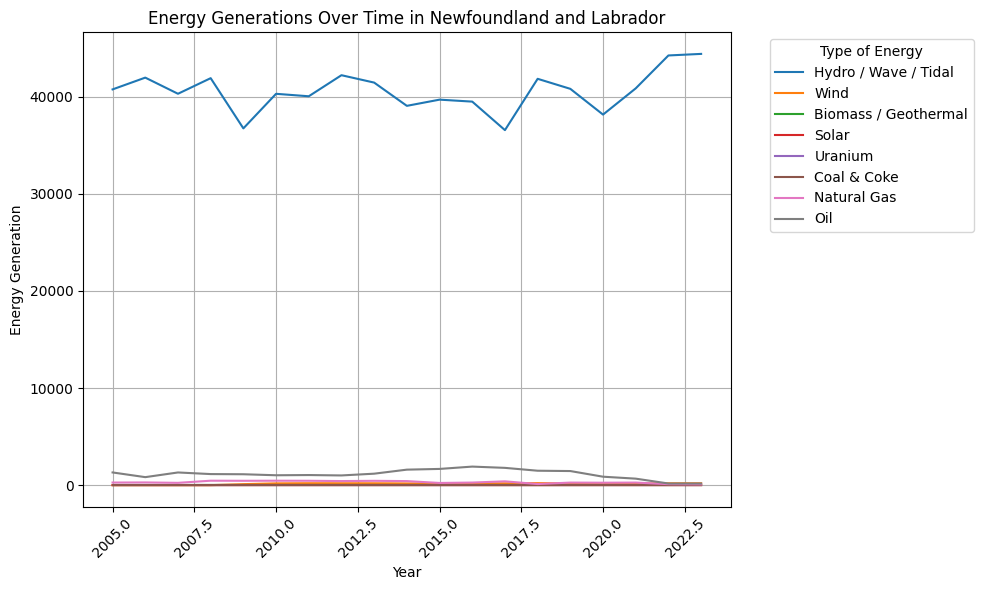

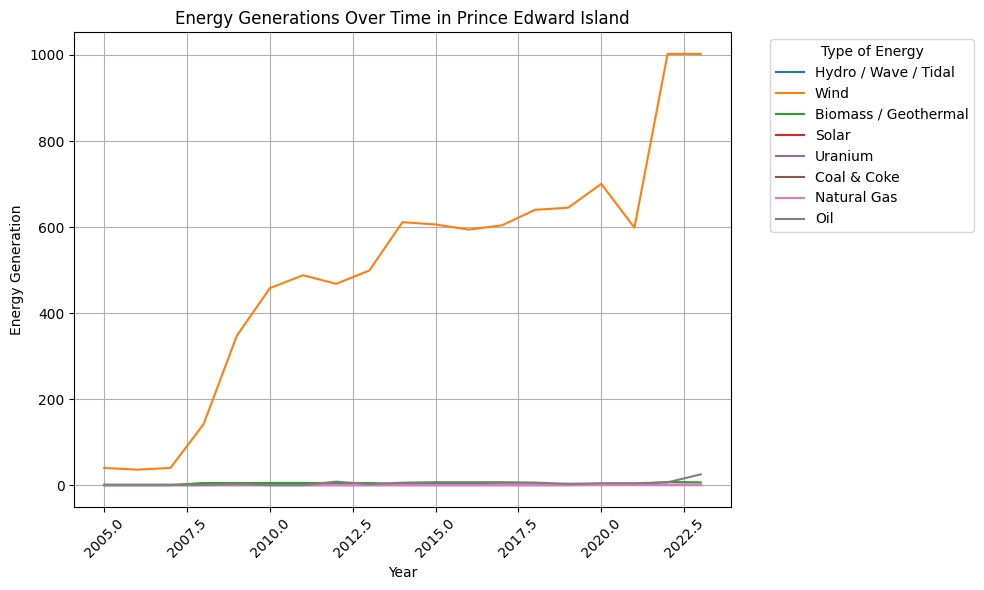

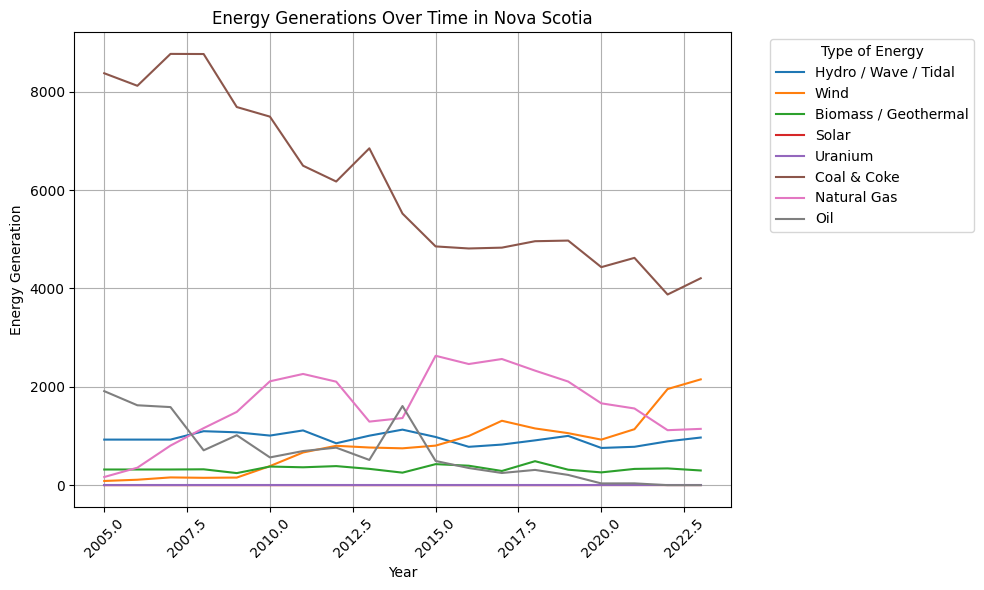

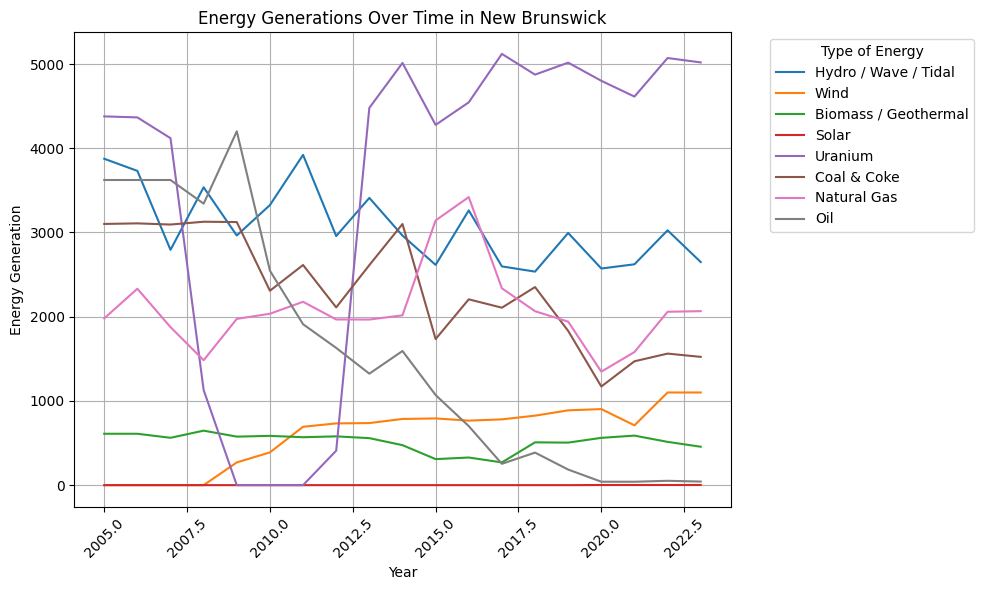

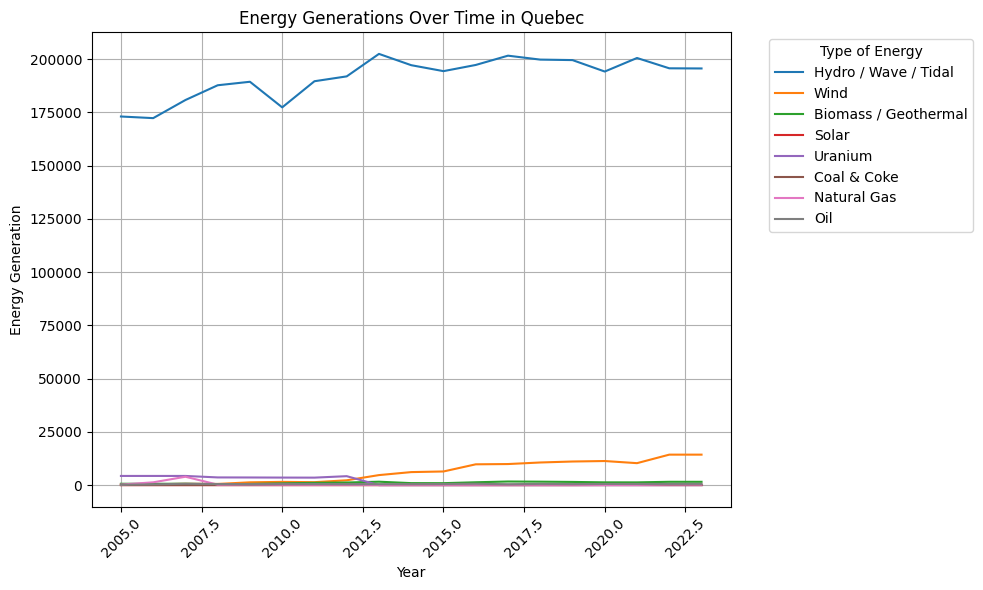

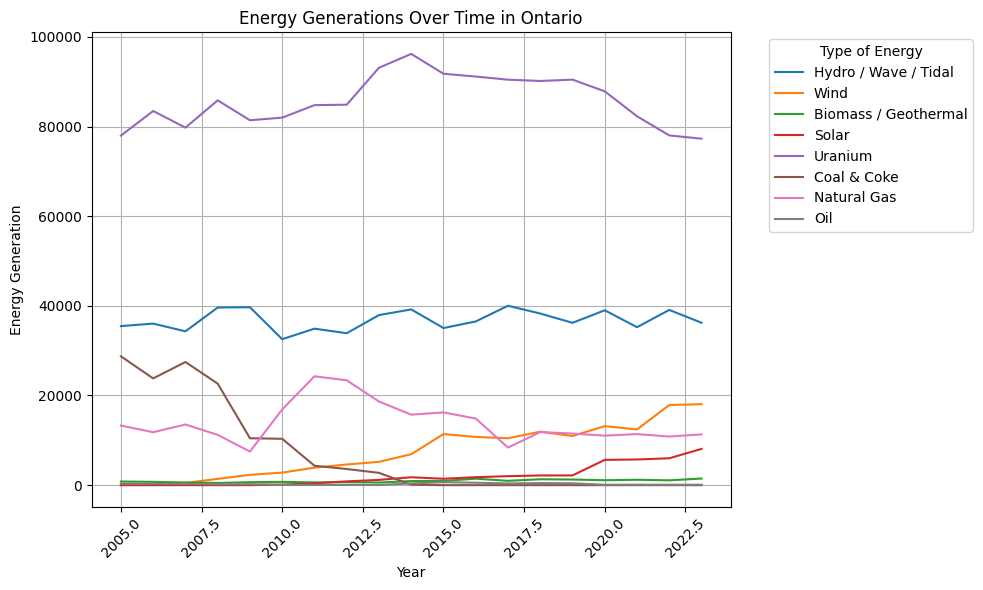

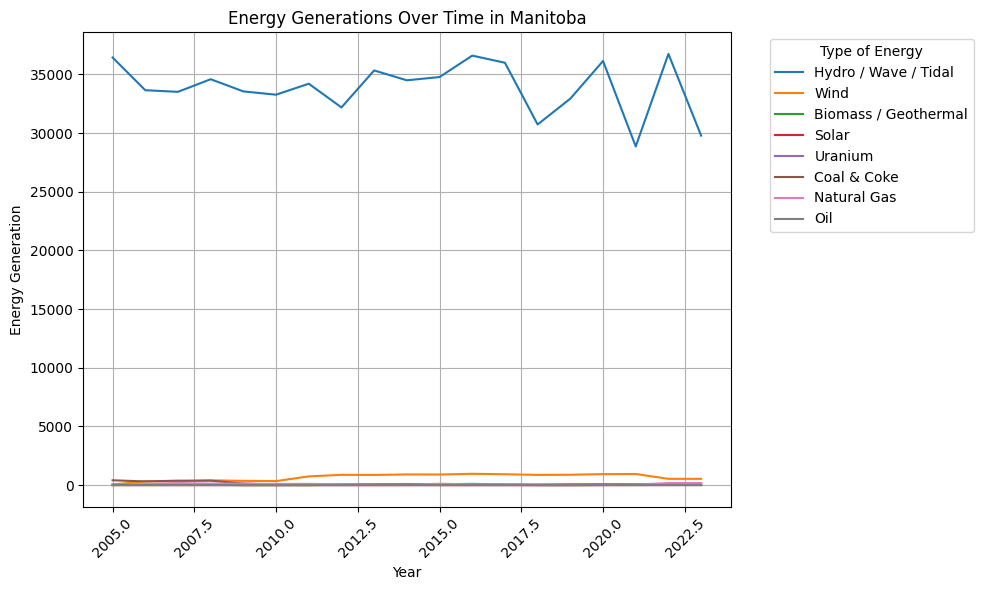

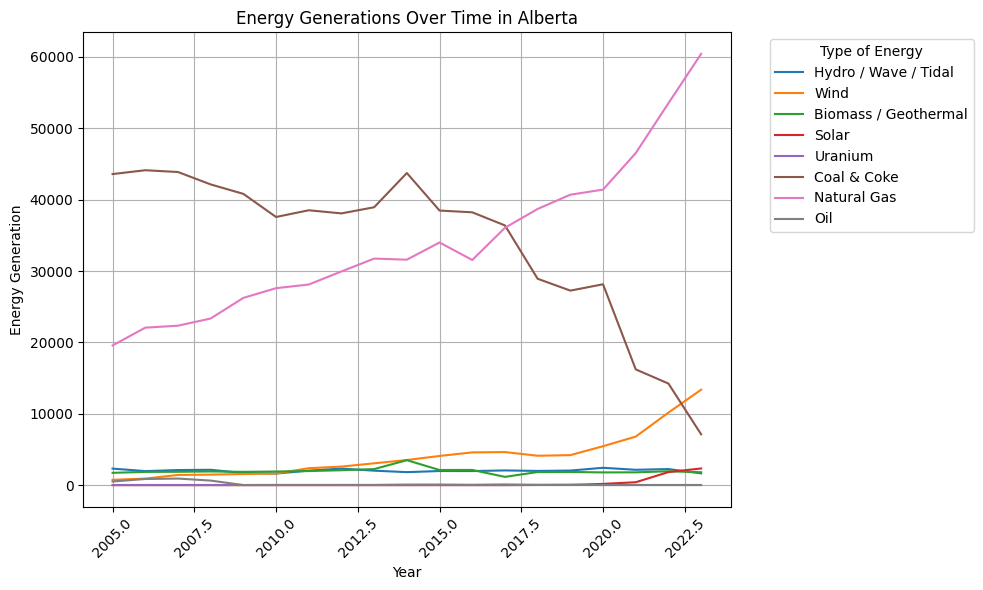

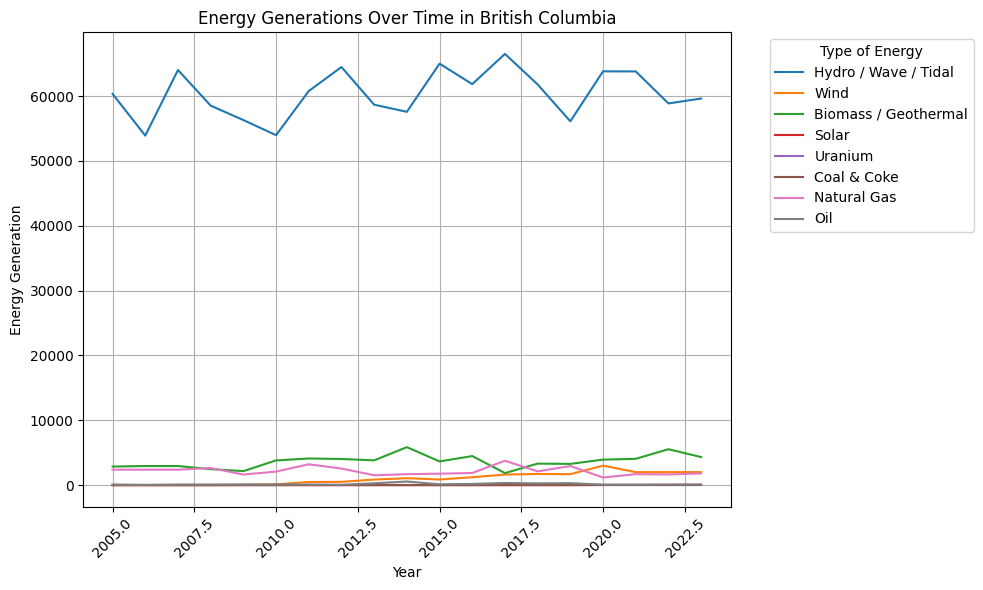

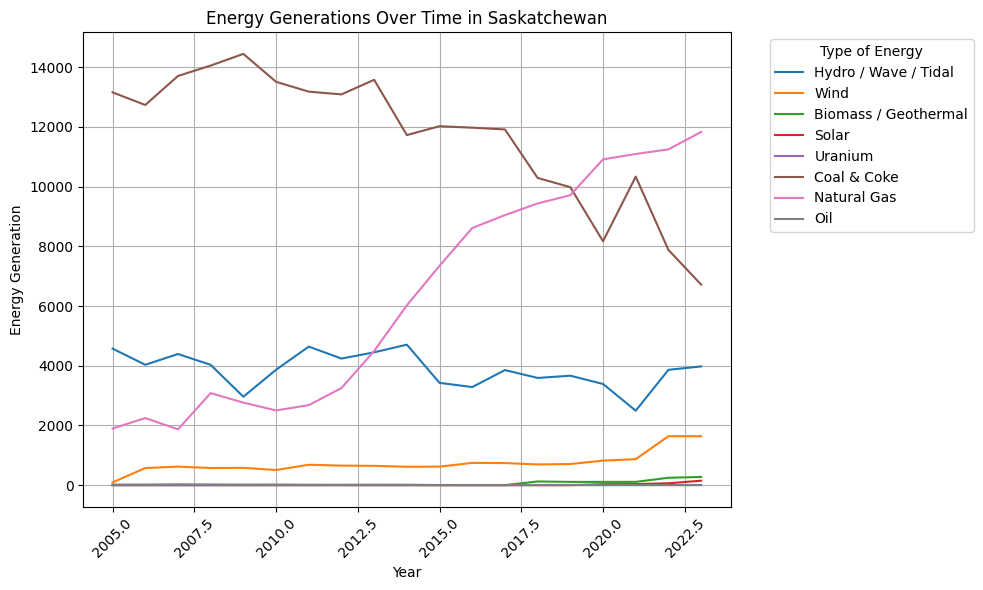

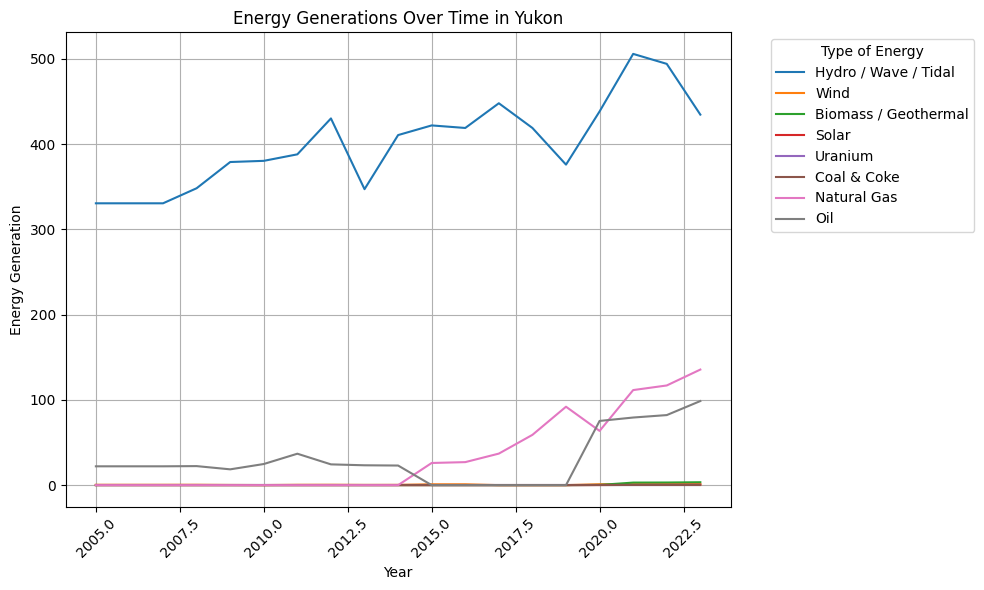

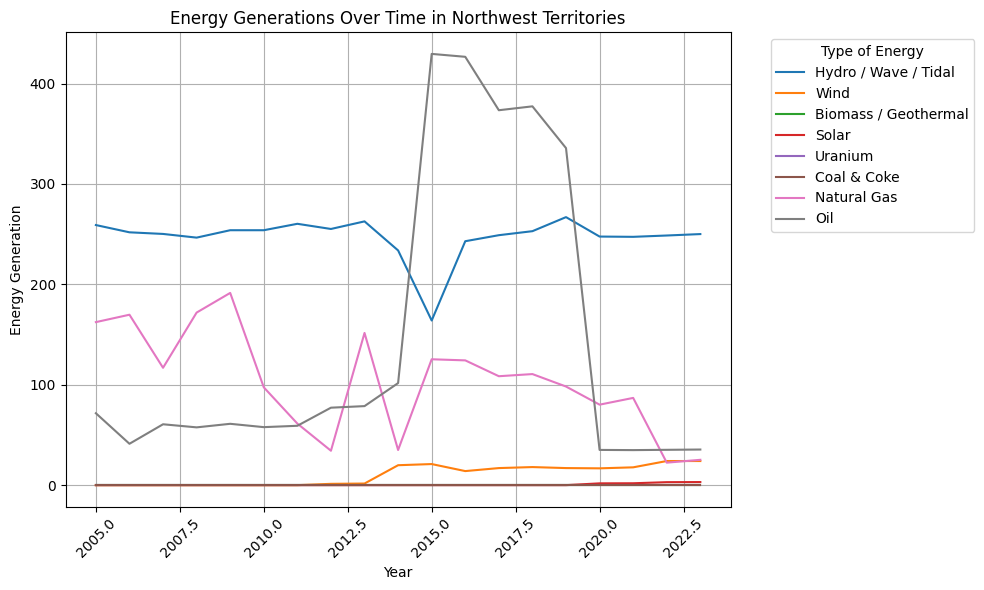

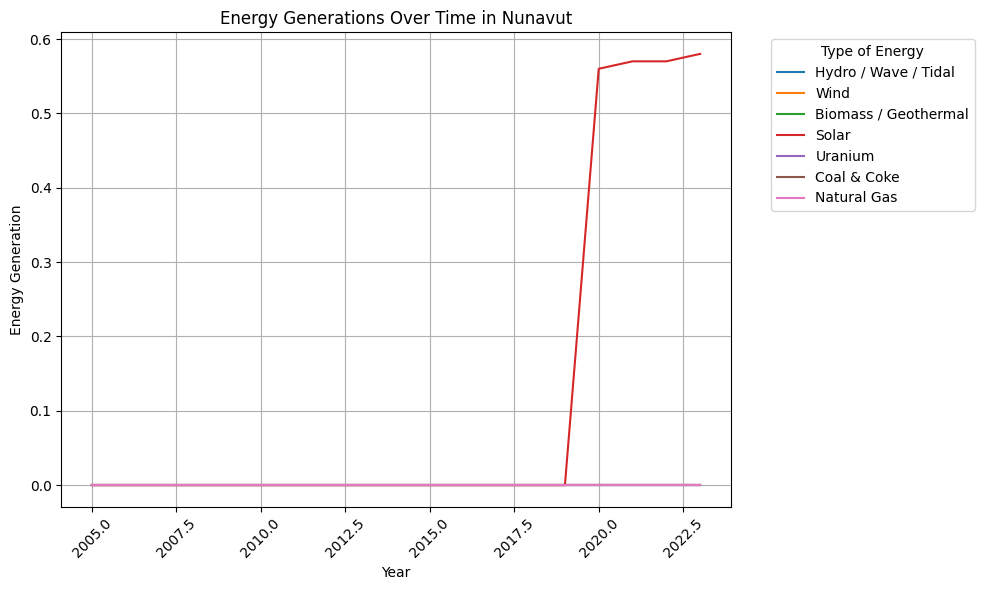

In [16]:
import os

for k, v in Table_clean.items():
    v = v.set_index('year')
    v.plot(kind='line', figsize=(10, 6))
    plt.title(f'Energy Generations Over Time in {k}')
    plt.xlabel('Year')
    plt.ylabel('Energy Generation')
    plt.xticks( rotation=45)
    plt.grid(True)
    # Show the plot
    plt.legend(title='Type of Energy', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    v = v.T
    v.to_csv(os.path.join("generation_csv/", f"Generation in {k}.csv"))
    plt.savefig(os.path.join("generation_images/", f"Generation of {k}"), bbox_inches = "tight", dpi=300)